In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import (make_blobs, make_circles, make_moons)
import pickle

In [5]:
def gaussian(x, y, x0, y0, sigma=1):
    return np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))

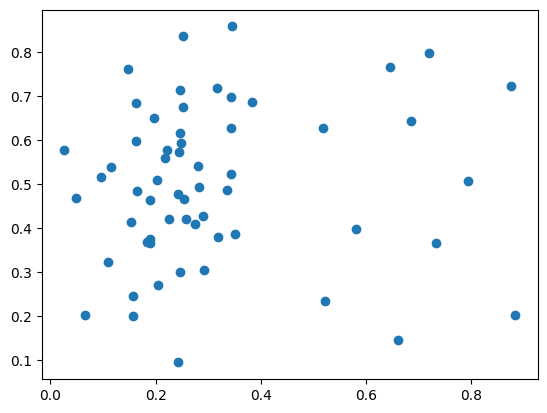

In [6]:
with open('./data/data_pickle/data_0.pkl', 'rb') as file:
    data = pickle.load(file)
    
data = np.array(data)
plt.scatter(data[:, 0], data[:, 1])

In [7]:
data[:, 0].min(), data[:, 0].max(), data[:, 1].min(), data[:, 1].max()

(0.026209677419354843,
 0.8830645161290324,
 0.09523809523809526,
 0.8582251082251082)

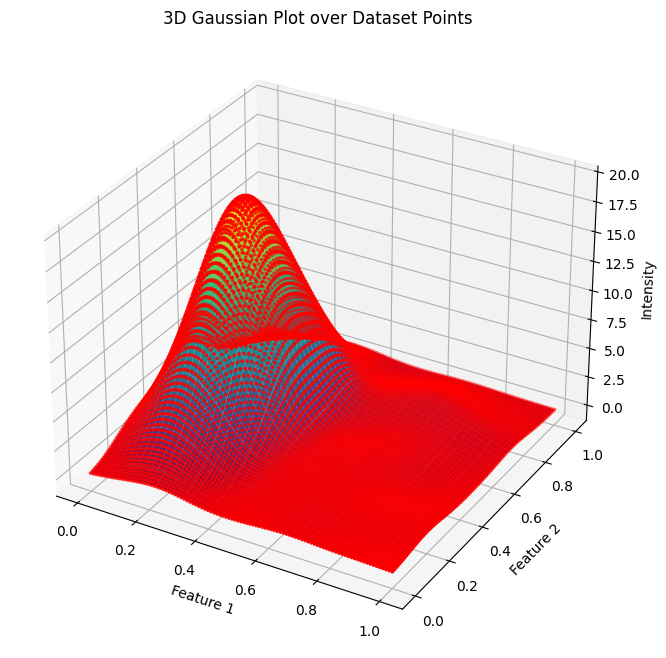

In [8]:
X = data

s = 0.1
# Function to generate a Gaussian peak at each data point

# Meshgrid for evaluation
grid = 400
x = np.linspace(0, 1, grid+1)
y = np.linspace(0, 1, grid+1)
x, y = np.meshgrid(x, y)

# Compute the sum of Gaussians at each grid point
z = np.zeros_like(x)
for point in X:
    z += gaussian(x, y, point[0], point[1], s)

# 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_title('3D Gaussian Plot over Dataset Points')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Intensity')


# add ball
ball = 100
ball_x = np.linspace(0, 1, ball+1)
ball_y = np.linspace(0, 1, ball+1)
ball_x, ball_y = np.meshgrid(ball_x, ball_y)

ball_z = np.array([[z[i][j] for j in np.arange(0, 400+400//ball, 400//ball)] for i in np.arange(0, 400+400//ball, 400//ball)])

ax.scatter3D(ball_x, ball_y, ball_z, c='r', s=3)

plt.show()

Text(0.5, 0, 'Intensity')

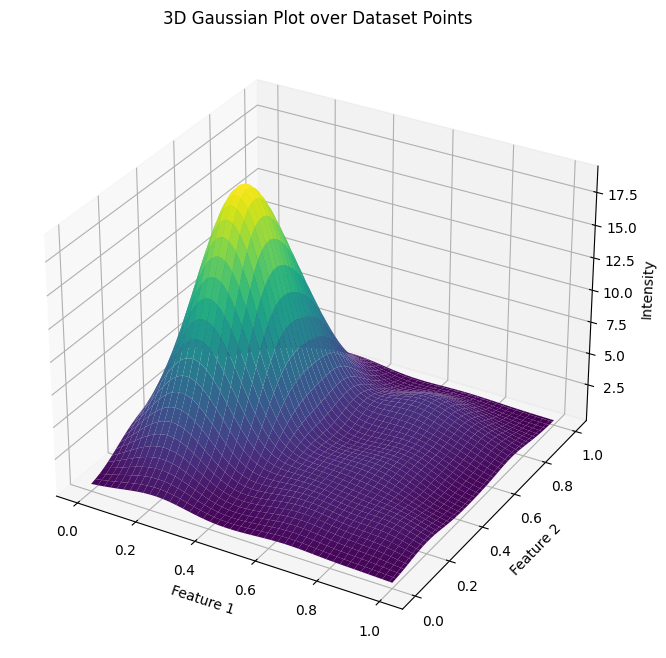

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_title('3D Gaussian Plot over Dataset Points')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Intensity')

In [10]:
bin_array = []

In [11]:
def plot_level(level_bin_array, size1 = 2):
    gen_num = len(level_bin_array)
    rows = gen_num//10 + 1
    plt.figure(figsize=(size1*10, size1*rows))

    for i in range(len(level_bin_array)):
        plt.subplot(rows, 10, i+1)
        plt.title(f"gen : {i}")
        plt.axis("off")
        plt.imshow(level_bin_array[i][::-1], cmap='gray')

    plt.show()

In [12]:
def gen_simul(data, lim, grid, ball, sigma, gen_num):
    global bin_array
    X = data
    xlim, ylim = lim
    x = np.linspace(0, xlim, grid+1)
    y = np.linspace(0, ylim, grid+1)
    x, y = np.meshgrid(x, y)

    # Compute the sum of Gaussians at each grid point
    z = np.zeros_like(x)
    for point in X:
        z += gaussian(x, y, point[0], point[1], sigma=sigma)

    # add ball
    ball_x = np.linspace(0, xlim, ball+1)
    ball_y = np.linspace(0, ylim, ball+1)
    ball_x, ball_y = np.meshgrid(ball_x, ball_y)

    ball_z = np.array([[z[i][j] for j in np.arange(0, 400+400//ball, 400//ball)] for i in np.arange(0, 400+400//ball, 400//ball)])

    # iter
    delta = [[-1, 0], [1, 0], [0, -1], [0, 1]]

    level = np.zeros((ball+3, ball+3))
    level[1:ball+2, 1:ball+2] = ball_z.copy()

    level_array = [level.copy()]

    level_bin = np.zeros((ball+3, ball+3))
    level_bin[1:ball+2, 1:ball+2] = np.ones((ball+1, ball+1))
    level_bin_array = [level_bin]

    gen = 1
    while gen < gen_num:
        temp = level.copy()
        temp_bin = level_bin.copy()
        for i in range(1, ball+2):
            for j in range(1, ball+2):
                flag = 1
                for d in delta:
                    if level[i+d[0], j+d[1]] > level[i, j]:  # 부등호에서 등호 삭제(edge 처리 문제)
                        flag = 0
                        break
                if flag:
                    temp[i, j] = 0
                    temp_bin[i, j] = 0

        gen += 1
        level_array.append(temp)
        level_bin_array.append(temp_bin)

        level = temp
        level_bin = temp_bin

    bin_array = level_bin.copy()

    plot_level(level_bin_array, size1=2)

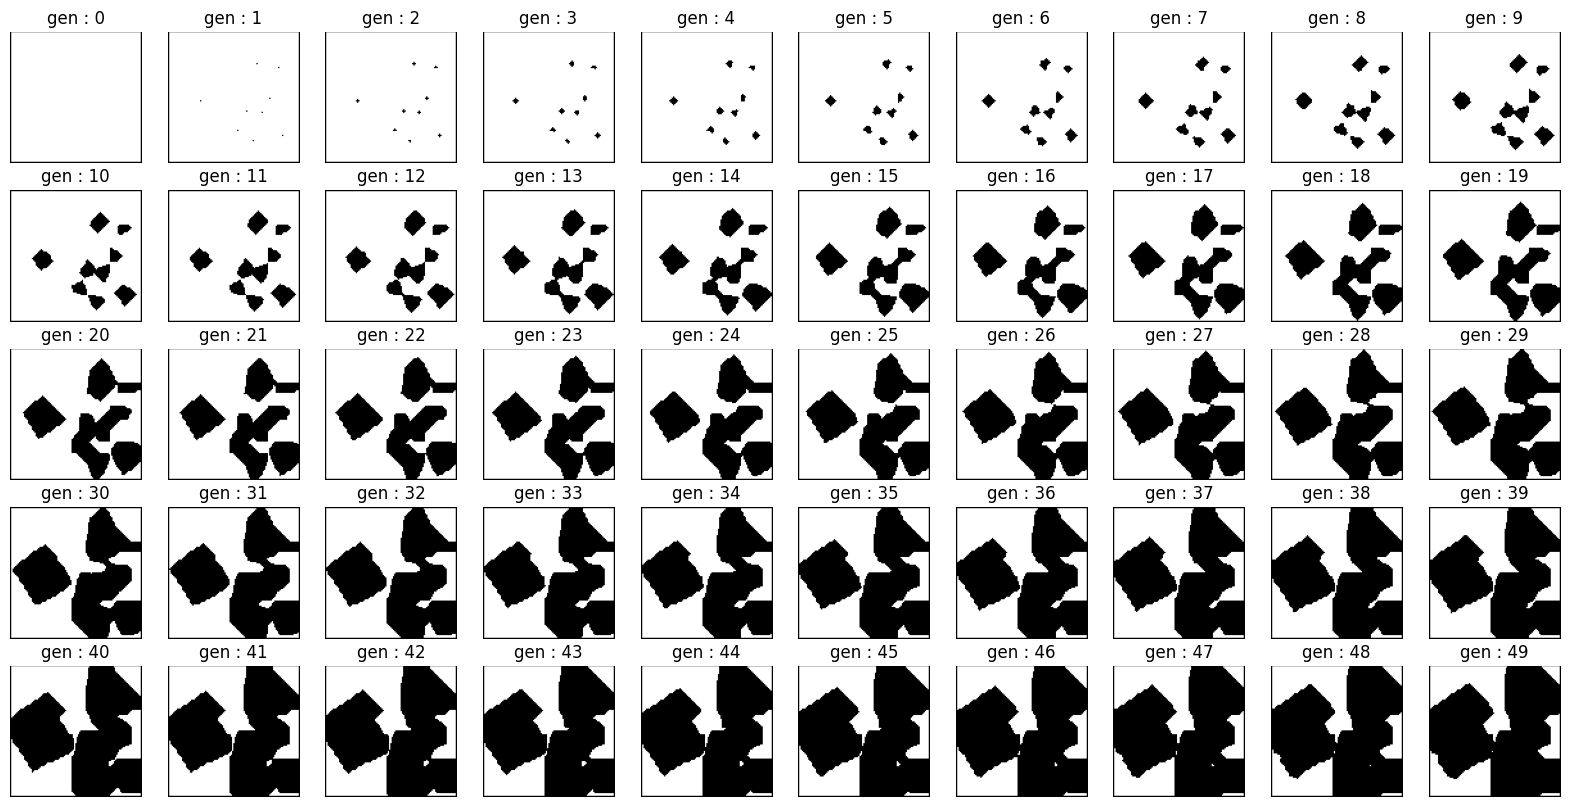

In [13]:
gen_simul(data=data, lim=(1, 1), grid=400, ball=100, sigma=0.07, gen_num=50)

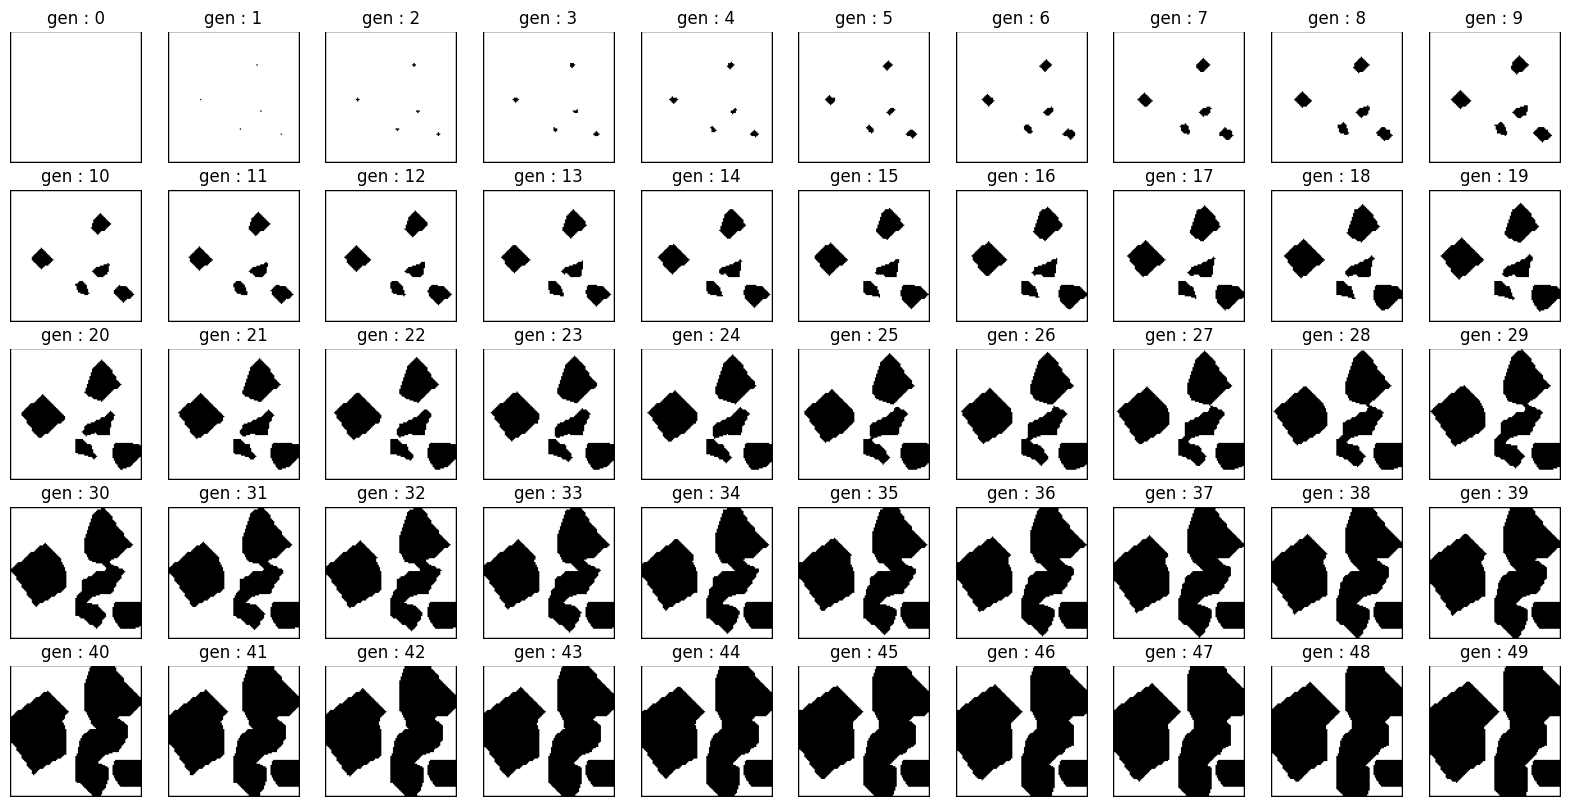

In [11]:
gen_simul(data=data, lim=(1, 1), grid=400, ball=100, sigma=0.08, gen_num=50)

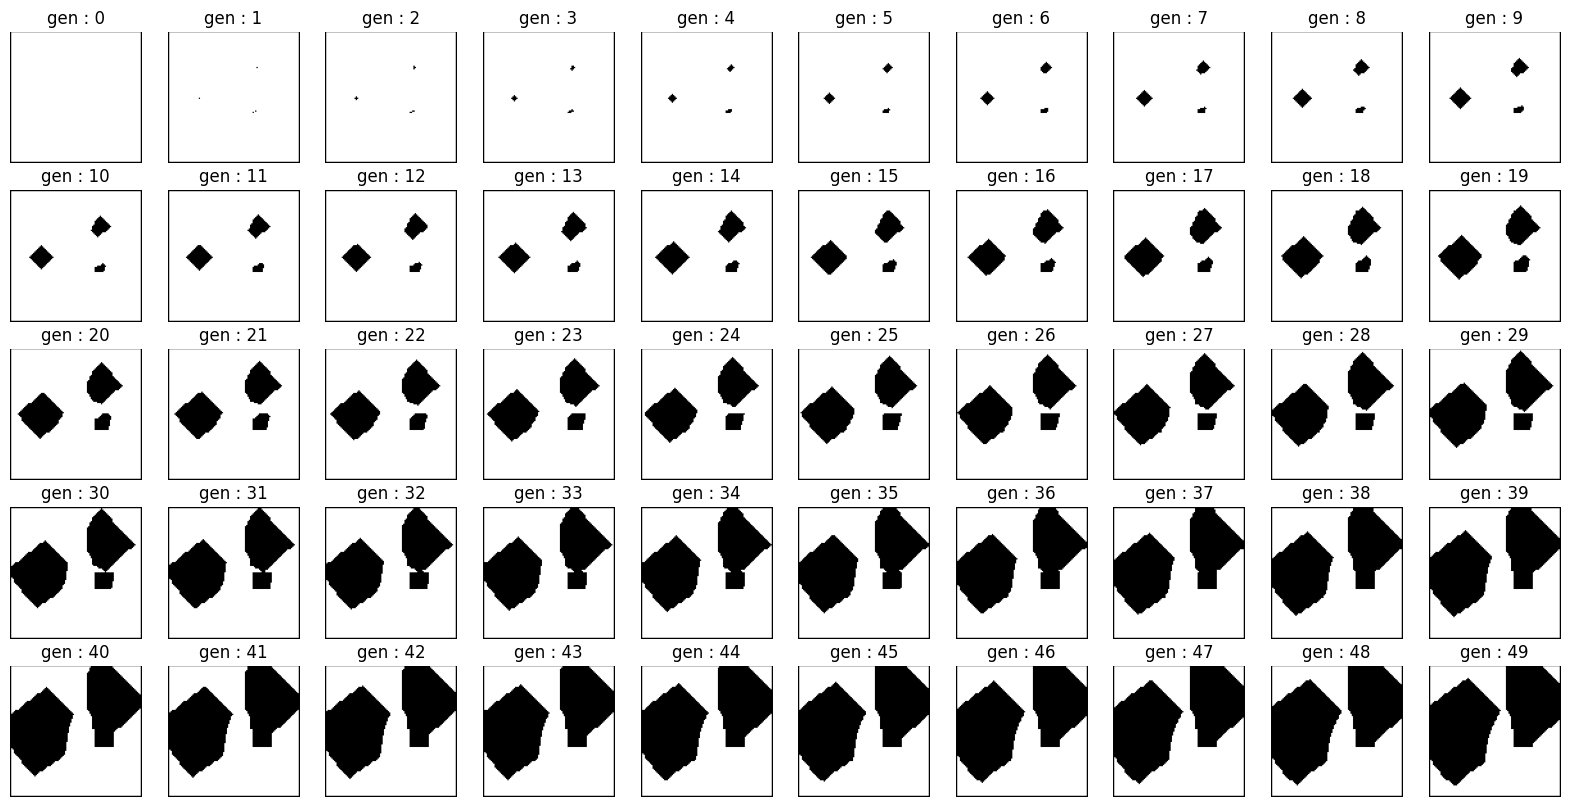

In [14]:
gen_simul(data=data, lim=(1, 1), grid=400, ball=100, sigma=0.1, gen_num=50)

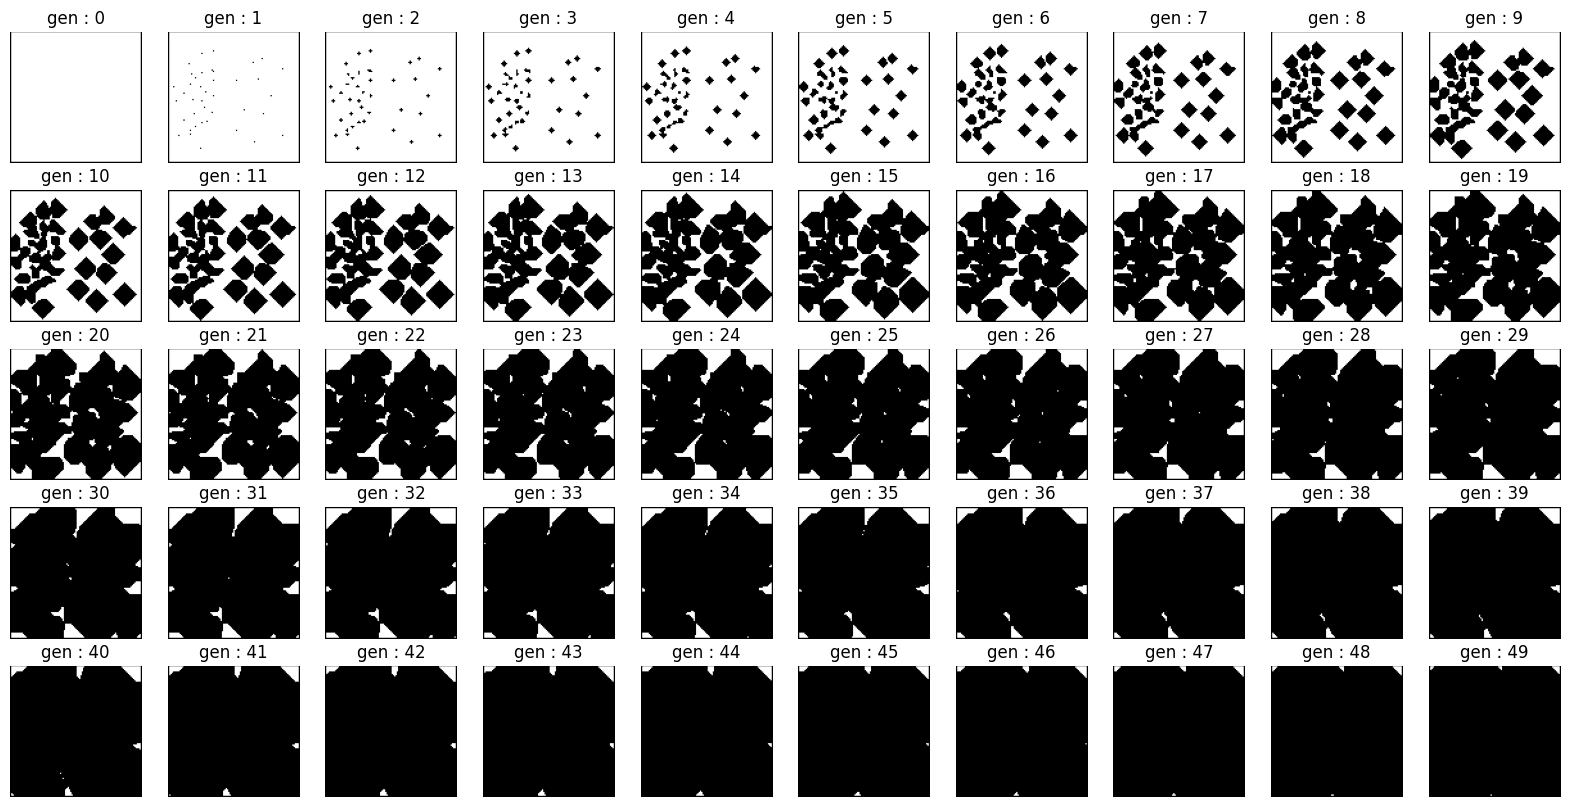

In [10]:
gen_simul(data=data, lim=(1, 1), grid=400, ball=100, sigma=0.02, gen_num=50)

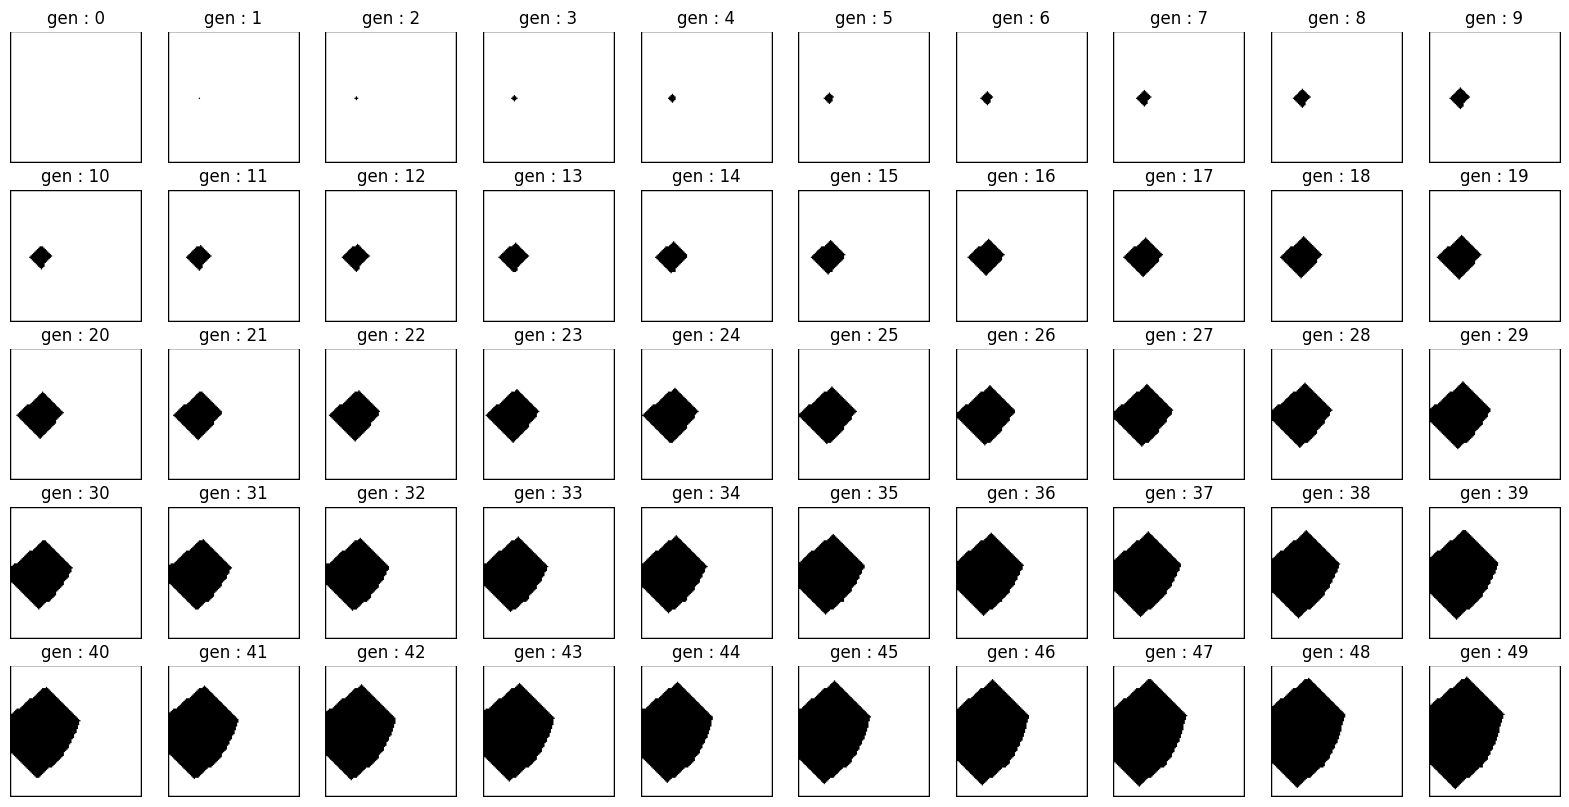

In [35]:
gen_simul(data=data, lim=(1, 1), grid=400, ball=100, sigma=0.13, gen_num=50)

In [4]:
with open('./data/data_0.pkl', 'rb') as file:
    data_0 = pickle.load(file)

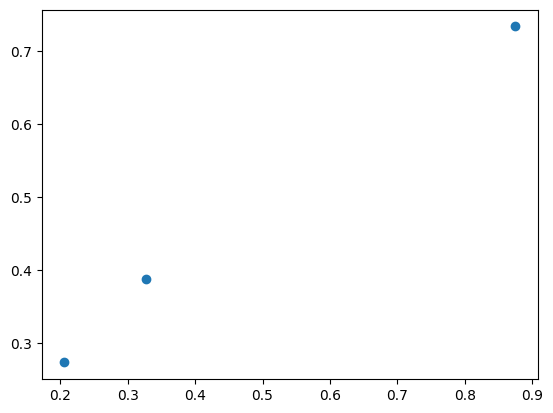

In [7]:
plt.scatter(data_0[:, 0], data_0[:, 1])

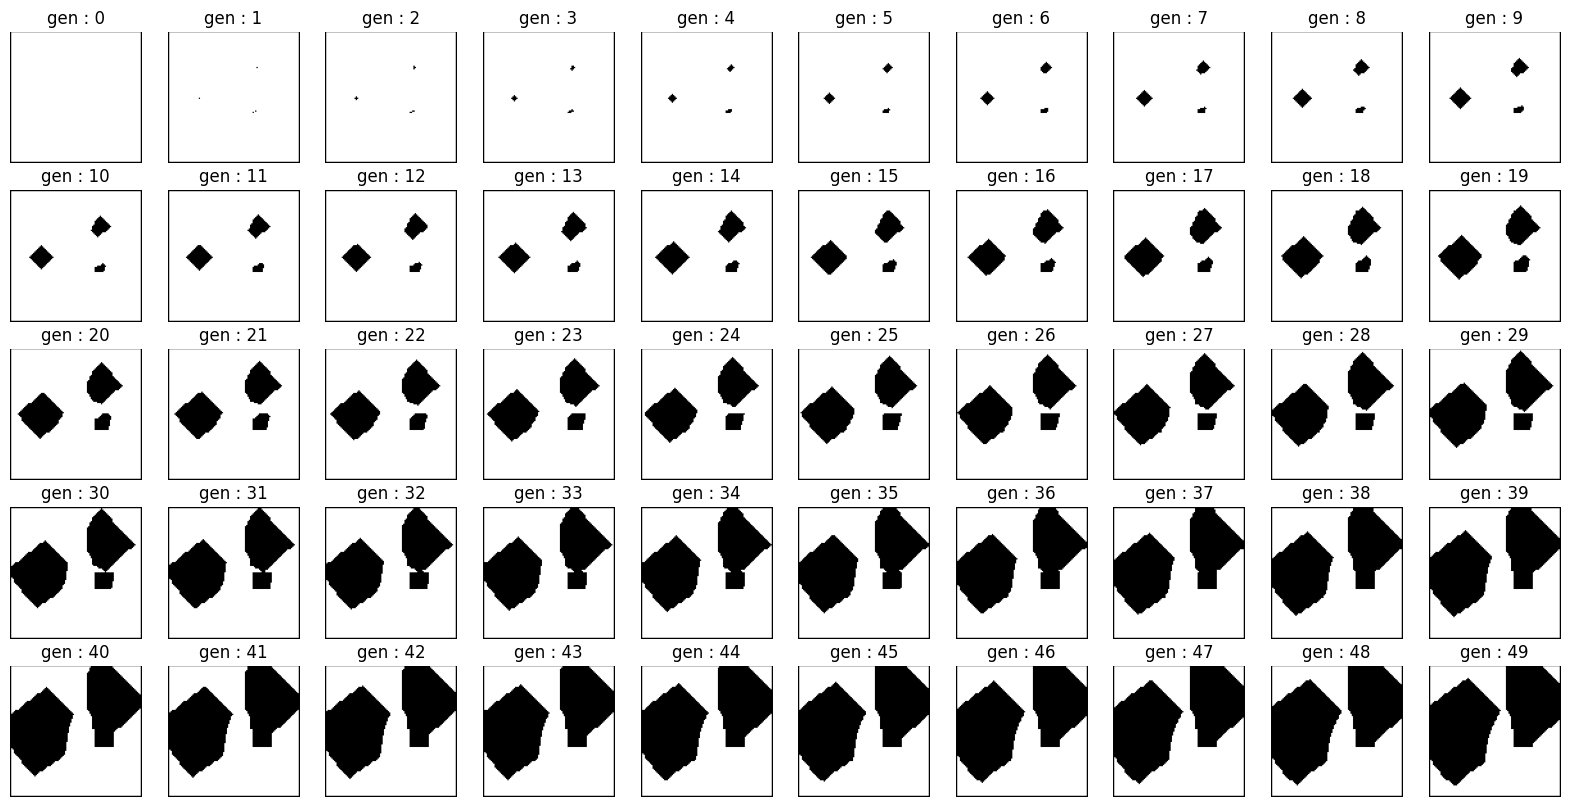

In [26]:
gen_simul(data=data, lim=(1, 1), grid=400, ball=100, sigma=0.1, gen_num=50)

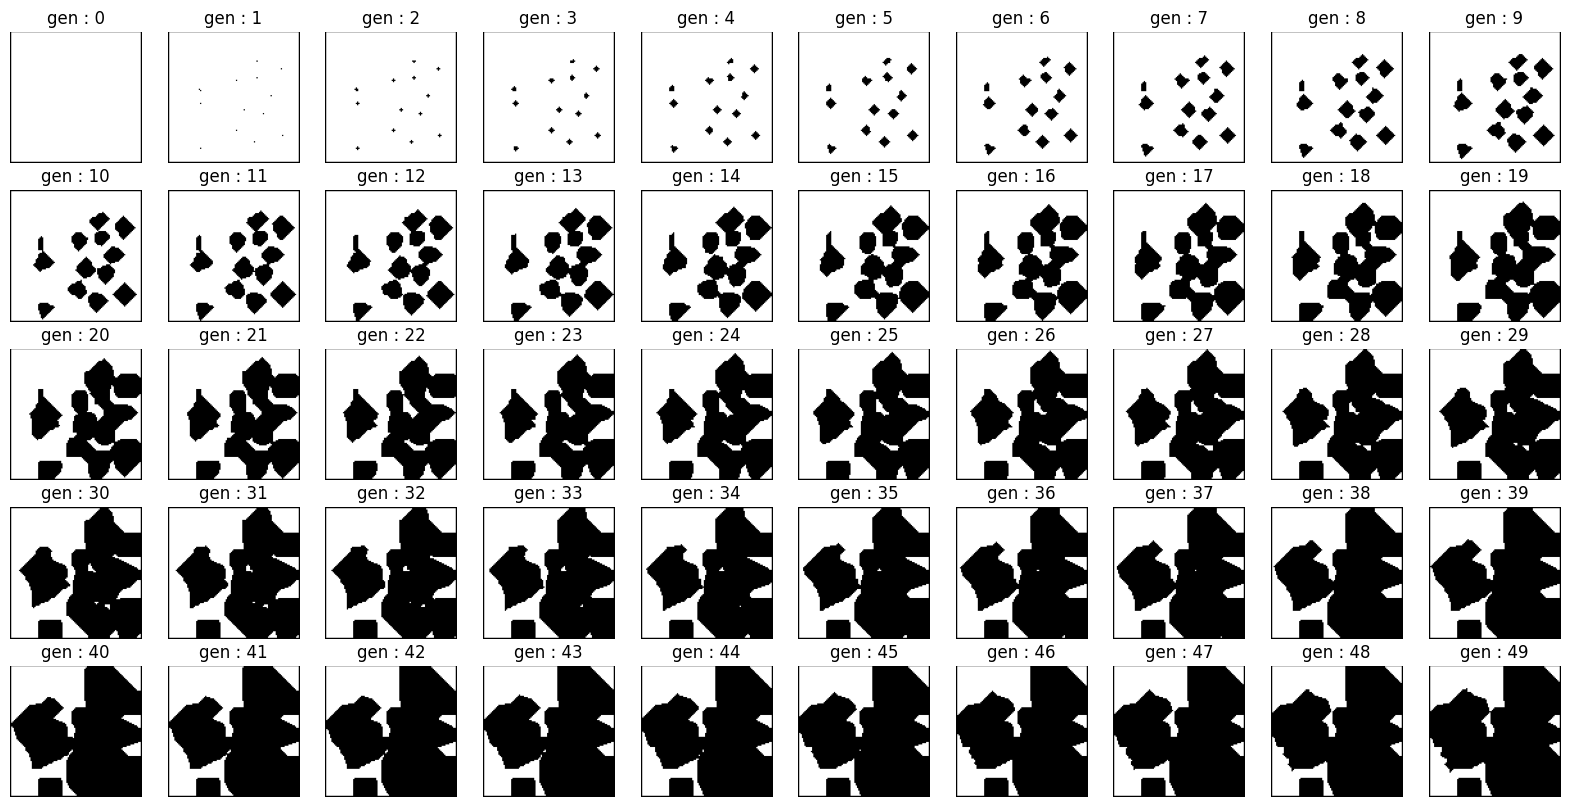

In [20]:
gen_simul(data=data, lim=(1, 1), grid=400, ball=100, sigma=0.05, gen_num=50)

In [21]:
# Outlier 같은 애들도 거의 같은 가중치로 클러스터처럼 취급됨..

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
from sklearn.svm import SVC

In [33]:
bin_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

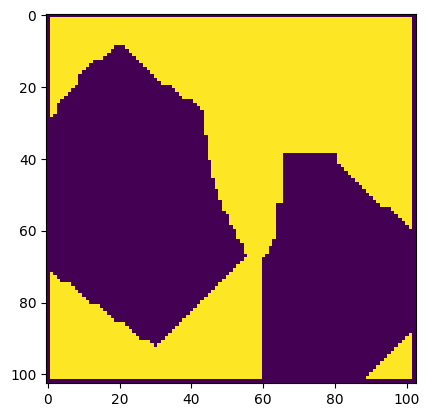

In [20]:
plt.imshow(bin_array)

In [15]:
print(bin_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 ...
 [0. 1. 1. ... 1. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
# 예시 2D 배열 (이미 0과 1로 구성됨)
array = bin_array

# 연결 성분 라벨링
labeled_array, num_features = label(array == 0)
print(labeled_array, num_features)

# 각 클러스터의 좌표 추출
clusters = [np.argwhere(labeled_array == i) for i in range(1, num_features + 1)]

# 데이터를 준비
X = np.vstack(clusters)
y = np.hstack([np.full(len(cluster), i) for i, cluster in enumerate(clusters)])
y = y.astype(np.float64)

if len(np.unique(y)) <= 1:
    raise ValueError("클러스터의 개수가 1개 이하입니다. 데이터를 확인하세요.")

# SVM을 사용하여 클러스터 간 경계선을 생성
svm = SVC(kernel='rbf', C=1, gamma='auto')
svm.fit(X, y)

# 경계선을 그리기 위한 그리드 생성
h = .02  # 그리드의 밀도
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 예측
Z = svm.predict(np.c_[yy.ravel(), xx.ravel()])
Z = Z.reshape(xx.shape)

# 결과 시각화
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan', 'magenta']

# 각 클러스터 시각화
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 1], cluster[:, 0], c=colors[i % len(colors)], label=f'Cluster {i + 1}')

plt.legend()
plt.title('Cluster Boundaries')
plt.show()


[[1 1 1 ... 1 1 1]
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 ...
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 [1 1 1 ... 1 1 1]] 1


ValueError: 클러스터의 개수가 1개 이하입니다. 데이터를 확인하세요.

In [16]:
plt.imshow(array)

NameError: name 'array' is not defined

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
from sklearn.svm import SVC

# 예시 2D 배열 (이미 0과 1로 구성됨)
# array = np.array([
#     [0, 0, 0, 1, 1, 1, 0, 0, 0],
#     [0, 1, 1, 1, 1, 1, 1, 1, 0],
#     [0, 1, 0, 0, 1, 0, 0, 1, 0],
#     [1, 1, 0, 0, 0, 0, 0, 1, 1],
#     [1, 1, 1, 0, 0, 0, 1, 1, 1],
#     [1, 1, 0, 0, 0, 0, 0, 1, 1],
#     [0, 1, 0, 0, 1, 0, 0, 1, 0],
#     [0, 1, 1, 1, 1, 1, 1, 1, 0],
#     [0, 0, 0, 1, 1, 1, 0, 0, 0]
# ])

array = bin_array

# 연결 성분 라벨링
labeled_array, num_features = label(array == 0)

print(labeled_array, num_features)

# 각 클러스터의 좌표 추출
clusters = [np.argwhere(labeled_array == i) for i in range(1, num_features + 1)]

# 데이터를 준비
X = np.vstack(clusters)
y = np.hstack([np.full(len(cluster), i) for i, cluster in enumerate(clusters)])

# 클러스터가 두 개 이상인지 확인
if len(np.unique(y)) <= 1:
    raise ValueError("클러스터의 개수가 1개 이하입니다. 데이터를 확인하세요.")

# SVM을 사용하여 클러스터 간 경계선을 생성
svm = SVC(kernel='rbf', C=1, gamma='auto')
svm.fit(X, y)

# 경계선을 그리기 위한 그리드 생성
h = .02  # 그리드의 밀도
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 예측
Z = svm.predict(np.c_[yy.ravel(), xx.ravel()])
Z = Z.reshape(xx.shape)

# 결과 시각화
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan', 'magenta']

# 각 클러스터 시각화
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 1], cluster[:, 0], c=colors[i % len(colors)], label=f'Cluster {i + 1}')

plt.legend()
plt.title('Cluster Boundaries')
plt.show()


[[1 1 1 ... 1 1 1]
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 ...
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 [1 1 1 ... 1 1 1]] 1


ValueError: 클러스터의 개수가 1개 이하입니다. 데이터를 확인하세요.